In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
tf.executing_eagerly()

True

In [28]:
X_train =  np.load('train_images.npy', allow_pickle=True)
y_train =  np.load('train_labels.npy', allow_pickle=True)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

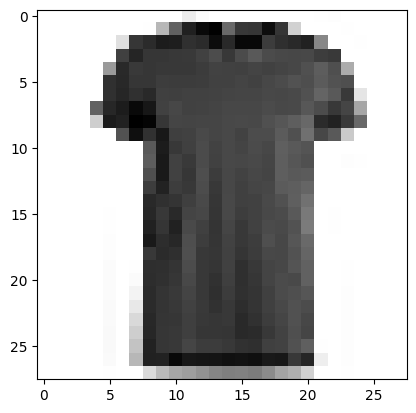

This is a T-shirt/top


In [29]:
# show image
data_idx = 17
plt.imshow(X_train[data_idx,:,:]/255, cmap='binary')
plt.show()
class_number = y_train[data_idx]
class_text = class_names[class_number]
print(f'This is a {class_text}')

In [30]:
# data prep
X_train = X_train/255
# X_train = X_train.reshape(-1, 784)

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoder = OneHotEncoder(sparse_output=False)

y_train_shaped = y_train.reshape(-1,1)

encoder.fit(y_train_shaped)
encoded = encoder.transform(y_train_shaped)

y_train_ohe = np.zeros((68000,10))
y_train_ohe[np.arange(68000), y_train] = 1

In [38]:

input_layer = Input(shape=(28,28,1))
hl_1 = Conv2D(28,(7,7), activation='relu', padding='same')(input_layer)
hl_1_max_pool = MaxPool2D((2,2))(hl_1)
hl_2 = Conv2D(20,(5,5), activation='relu', padding='same')(hl_1_max_pool)
hl_2_max_pool = MaxPool2D((2,2))(hl_2)
hl_3 = Conv2D(20,(3,3), activation='relu', padding='same')(hl_2_max_pool)
hl_3_max_pool = MaxPool2D((2,2))(hl_3)

flatten_layer = Flatten()(hl_3_max_pool)
output_layer = Dense(10, activation='softmax')(flatten_layer)

model_3 = Model(inputs=input_layer, outputs=output_layer)
model_3.compile(optimizer='adam',loss='categorical_crossentropy', metrics='accuracy')

In [34]:

# model_3 = Model(inputs=input_layer, outputs=output_layer)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
print(X_train.size)
print(encoded.size)

53312000
680000


In [37]:
y_train = encoded

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
 
# X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [39]:
# history = model_3.fit(X_train_splitted, y_train_splitted, batch_size=128, epochs=1024, validation_data=(X_val,y_val))

#Magnus ver
history = model_3.fit(X_train, y_train, batch_size=84, epochs=32, validation_data=(X_test,y_test))

Epoch 1/32


648/648 [==============================] - 11s 16ms/step - loss: 0.6723 - accuracy: 0.7606 - val_loss: 0.4758 - val_accuracy: 0.8326
Epoch 2/32
648/648 [==============================] - 10s 15ms/step - loss: 0.4363 - accuracy: 0.8447 - val_loss: 0.3939 - val_accuracy: 0.8624
Epoch 3/32
648/648 [==============================] - 11s 17ms/step - loss: 0.3771 - accuracy: 0.8656 - val_loss: 0.3945 - val_accuracy: 0.8561
Epoch 4/32
648/648 [==============================] - 11s 17ms/step - loss: 0.3459 - accuracy: 0.8745 - val_loss: 0.3390 - val_accuracy: 0.8774
Epoch 5/32
648/648 [==============================] - 11s 17ms/step - loss: 0.3231 - accuracy: 0.8824 - val_loss: 0.3338 - val_accuracy: 0.8796
Epoch 6/32
648/648 [==============================] - 11s 17ms/step - loss: 0.3041 - accuracy: 0.8896 - val_loss: 0.3221 - val_accuracy: 0.8818
Epoch 7/32
648/648 [==============================] - 11s 17ms/step - loss: 0.2897 - accuracy: 0.8950 - val_loss: 0.3312 - val_accurac

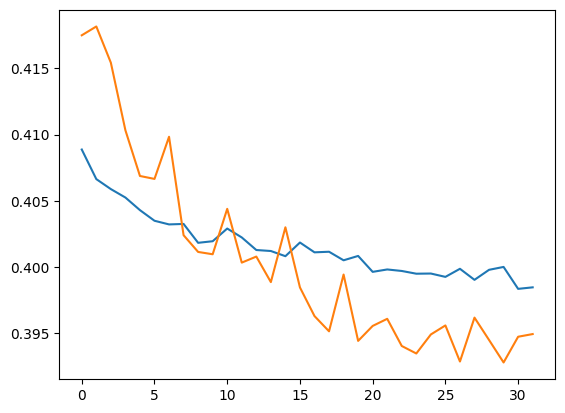

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

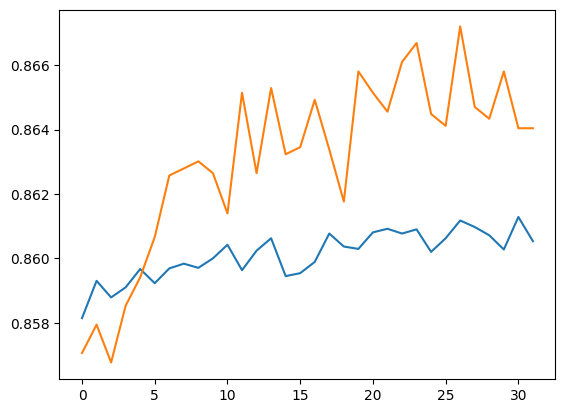

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [ ]:
history.history["accuracy"]

[0.8581433892250061,
 0.8593014478683472,
 0.8587867617607117,
 0.859099268913269,
 0.8596690893173218,
 0.8592279553413391,
 0.8596875071525574,
 0.8598345518112183,
 0.8597058653831482,
 0.8600000143051147,
 0.8604227900505066,
 0.8596323728561401,
 0.8602389693260193,
 0.8606250286102295,
 0.8594485521316528,
 0.8595404624938965,
 0.8598896861076355,
 0.8607720732688904,
 0.8603676557540894,
 0.8602941036224365,
 0.8608088493347168,
 0.8609191179275513,
 0.8607720732688904,
 0.8609007596969604,
 0.8602021932601929,
 0.8606250286102295,
 0.8611764907836914,
 0.8609742522239685,
 0.8607169389724731,
 0.8602757453918457,
 0.8612867593765259,
 0.8605330586433411]

(array([1., 0., 1., 3., 6., 3., 4., 5., 6., 3.]),
 array([0.85814339, 0.85845773, 0.85877206, 0.8590864 , 0.85940074,
        0.85971507, 0.86002941, 0.86034375, 0.86065809, 0.86097242,
        0.86128676]),
 <BarContainer object of 10 artists>)

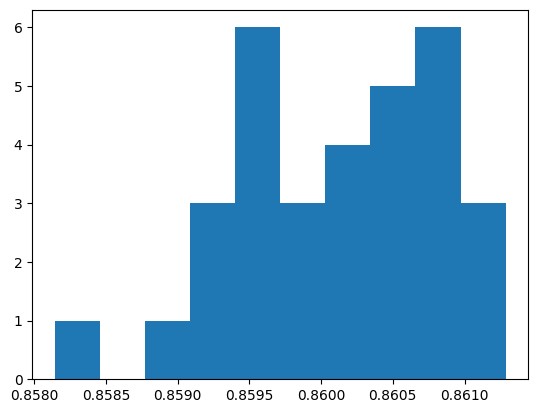

In [ ]:
plt.hist(history.history["accuracy"])

In [ ]:
# prediction = model_3.predict(X_test)

In [ ]:
# predic validation data
X_validate = np.load('val_images.npy', allow_pickle=True)
# data prep
X_validate = X_validate/255
# my_prediction = np.array([9,0,0,3,...])

prediction = model_3.predict(X_validate)

63/63 [==============================] - 0s 1ms/step


In [ ]:
the_score = model_3.evaluate(X_test, y_test)

425/425 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8461


In [ ]:
the_score

[0.44243037700653076, 0.8461029529571533]

In [ ]:
np.round(prediction[0, :], 2)

# Get the index of the maximum value in each row
argmaxed = np.argmax(prediction, axis=1)
argmaxed

array([2, 3, 9, ..., 3, 9, 5], dtype=int64)

In [ ]:
my_name = "Marius"
np.save(my_name+"_cond_2.npy", argmaxed)